In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc
import urllib.request
from datetime import datetime, timedelta
import json
import pandas as pd

def main():
    
    json_result = []
    result = []
    
    print("코로나 발병 통계")
    nStart = input("시작일자 : ")
    nEnd = input("종료일자 : ")
    path = '/Users/yanghyunjik/Desktop/bigdata/covid_%s_%s.csv' %(nStart, nEnd)
    
    json_result, result = getCovidStatsService(nStart, nEnd)
    
    with open('/Users/yanghyunjik/Desktop/bigdata/covid_%s_%s.json' % (nStart, nEnd), 'w', encoding='utf-8') as outfile:
        jsonFile = json.dumps(json_result, indent=4, sort_keys= True, ensure_ascii=False)
        
        outfile.write(jsonFile)
        
    columns = ['누적확진율','누적검사수', '누적검사완료수', '치료중환자수', '격리해재수', '사망자수','확진자수','결과음성수','기준일자','기준시간','검사중수']
    result_df = pd.DataFrame(result, columns=columns)
    result_df.to_csv(path , index=False, encoding='cp949')
    
    df = pd.read_csv(path, encoding='cp949', index_col=1)
    cols = df.columns.values
    row =  df[pd.DatetimeIndex(df.index).day == 15]
    for col in cols:
        drawChart(row, col)
        
def getRequestUrl(url):
    req = urllib.request.Request(url)

    try :
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print("[%s] Url Request Success" %datetime.now())
            return response.read().decode('utf-8')  #요청 결과를 반환
        
    except Exception as e :
        print(e)
        print("[%s] Error for URL : %s" %(datetime.now(), url))
        return None

def getCovidStatsItem(date):
    service_url = 'http://apis.data.go.kr/1352000/ODMS_COVID_02/callCovid02Api'
    key = '%2FH1gjQ0RIdraQdnpqe1aV%2BT34G1zGrDy1Zwb0PSh0Shg6Qytr2cekv4KuuHXxDJpDUiABfWTLGQRy%2BdywBVn%2Bg%3D%3D'

    params = "?&serviceKey=" + key
    params += "&pageNo=1"
    params += "&numOfRows=500"
    params += "&apiType=JSON"
    params += "&status_dt=" + date

    
    url = service_url + params
    
    responseDecode = getRequestUrl(url)

    if(responseDecode == None):
        return None
    else :
        return json.loads(responseDecode)
    
def getCovidStatsService(nStart, nEnd):
    jsonResult = []
    result = []
    start = datetime.strptime(nStart, "%Y%m%d")
    end = datetime.strptime(nEnd, "%Y%m%d")
    isDataEnd = 0
    
    for i in range((end-start).days+1):
        date = (start + timedelta(days=i)).strftime("%Y%m%d") 
        if (isDataEnd == 1):
            break
        
        jsonData = getCovidStatsItem(date)
            
        if(jsonData['resultMsg'] == 'NORMAL SERVICE'):
            if(not jsonData['items']):
                isDataEnd = 1
                end_date = date
                print("데이터 없음..\n제공되는 데이터는 %s까지 입니다" %(end_date))
                break
            
            print(json.dumps(jsonData, indent=4, sort_keys=True, ensure_ascii=False))
            print('-----------------------------------------')
        
            for item in jsonData['items']:
                date = item['statusDt']#기준일
                time = item['statusTime']#기준시간
                num_hPntCnt = item['hPntCnt']#확진자수
                num_dPntCnt = item['dPntCnt']#격리해제 수
                num_uPntCnt = item['uPntCnt']#검사진행 수
                num_gPntCnt = item['gPntCnt']#사망자 수
                num_careCnt = item['careCnt']#치료중 환자 수
                num_resultNegCnt = item['resutlNegCnt']#결과 음성 수
                num_accExamCnt = item ['accExamCnt']#누적 검사 수
                num_accExamCompCnt = item ['accExamCompCnt']#누적 검사완료 수
                num_accDefRate = item ['accDefRate']#누적확진율
                
            jsonResult.append({'date' : date,
                               'time' : time,
                               'hPntCnt': num_hPntCnt,
                               'dPntCnt' : num_dPntCnt,
                               'uPntCnt' : num_uPntCnt,
                               'gPntCnt' : num_gPntCnt,
                               'careCnt': num_careCnt,
                               'resultNegCnt' : num_resultNegCnt,
                               'accExamCnt' : num_accExamCnt,
                               'accExamCompCnt' : num_accExamCompCnt,
                               'accDefRate' : num_accDefRate})
            
            save_date = datetime.strptime(str(date), "%Y%m%d").strftime("%Y-%m-%d")
            
            result.append([save_date, time, num_hPntCnt, num_dPntCnt, num_uPntCnt, num_gPntCnt,
                        num_careCnt, num_resultNegCnt, num_accExamCnt, num_accExamCompCnt, num_accDefRate])

    return (jsonResult, result)

matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

def drawChart(df, col):
    plt.figure(figsize=(15,5))
    plt.plot(df.index, df[col], label=col)
    plt.title(col)
    plt.xlabel('날짜')
    plt.ylabel(col)
    plt.savefig('/Users/yanghyunjik/Desktop/bigdata/%s.png' %col)

    plt.close()


if __name__ == '__main__':
    main()

코로나 발병 통계
시작일자 : 20210201
종료일자 : 20210301
[2023-06-09 01:29:56.265732] Url Request Success
{
    "items": [
        {
            "accDefRate": "1.424102272",
            "accExamCnt": "5661841",
            "accExamCompCnt": "5512385",
            "careCnt": "8790",
            "dPntCnt": "68287",
            "gPntCnt": "1425",
            "hPntCnt": "78502",
            "resutlNegCnt": "5433883",
            "statusDt": "20210201",
            "statusTime": "00:00",
            "uPntCnt": "149456"
        }
    ],
    "numOfRows": "500",
    "pageNo": "1",
    "resultCode": "00",
    "resultMsg": "NORMAL SERVICE",
    "totalCount": 1232
}
-----------------------------------------
[2023-06-09 01:29:58.006383] Url Request Success
{
    "items": [
        {
            "accDefRate": "1.418677606",
            "accExamCnt": "5711412",
            "accExamCompCnt": "5557147",
            "careCnt": "8647",
            "dPntCnt": "68756",
            "gPntCnt": "1435",
            "hPntCnt

[2023-06-09 01:33:39.402586] Url Request Success
{
    "items": [
        {
            "accDefRate": "1.377739762",
            "accExamCnt": "6140085",
            "accExamCompCnt": "6061885",
            "careCnt": "8444",
            "dPntCnt": "73551",
            "gPntCnt": "1522",
            "hPntCnt": "83517",
            "resutlNegCnt": "5978368",
            "statusDt": "20210214",
            "statusTime": "00:00",
            "uPntCnt": "78200"
        }
    ],
    "numOfRows": "500",
    "pageNo": "1",
    "resultCode": "00",
    "resultMsg": "NORMAL SERVICE",
    "totalCount": 1232
}
-----------------------------------------
[2023-06-09 01:33:40.927111] Url Request Success
{
    "items": [
        {
            "accDefRate": "1.378661134",
            "accExamCnt": "6162859",
            "accExamCompCnt": "6082713",
            "careCnt": "8547",
            "dPntCnt": "73786",
            "gPntCnt": "1527",
            "hPntCnt": "83860",
            "resutlNegCnt": "59

[2023-06-09 01:35:07.596032] Url Request Success
{
    "items": [
        {
            "accDefRate": "1.361786154",
            "accExamCnt": "6627214",
            "accExamCompCnt": "6558225",
            "careCnt": "7396",
            "dPntCnt": "80318",
            "gPntCnt": "1595",
            "hPntCnt": "89309",
            "resutlNegCnt": "6468916",
            "statusDt": "20210227",
            "statusTime": "00:00",
            "uPntCnt": "68989"
        }
    ],
    "numOfRows": "500",
    "pageNo": "1",
    "resultCode": "00",
    "resultMsg": "NORMAL SERVICE",
    "totalCount": 1232
}
-----------------------------------------
[2023-06-09 01:35:09.413814] Url Request Success
{
    "items": [
        {
            "accDefRate": "1.363479598",
            "accExamCnt": "6649005",
            "accExamCompCnt": "6576116",
            "careCnt": "7378",
            "dPntCnt": "80683",
            "gPntCnt": "1603",
            "hPntCnt": "89664",
            "resutlNegCnt": "64

<< 코로나 통계 데이터를 수집합니다. >>
데이터를 몇 년부터 수집할까요?(연월일) : 20220301
데이터를 몇 년까지 수집할까요?(연월일) : 20220310
20220301
[%s] Url Request Success
{
    "items": [
        {
            "accDefRate": "0",
            "accExamCnt": "22072870",
            "accExamCompCnt": "0",
            "careCnt": "0",
            "dPntCnt": "0",
            "gPntCnt": "8170",
            "hPntCnt": "3273431",
            "resutlNegCnt": "0",
            "statusDt": "20220301",
            "statusTime": "00:00",
            "uPntCnt": "0"
        }
    ],
    "numOfRows": "500",
    "pageNo": "1",
    "resultCode": "00",
    "resultMsg": "NORMAL SERVICE",
    "totalCount": 1241
}
20220302
[%s] Url Request Success
{
    "items": [
        {
            "accDefRate": "0",
            "accExamCnt": "22072870",
            "accExamCompCnt": "0",
            "careCnt": "0",
            "dPntCnt": "0",
            "gPntCnt": "8266",
            "hPntCnt": "3492659",
            "resutlNegCnt": "0",
            "statusDt": "20

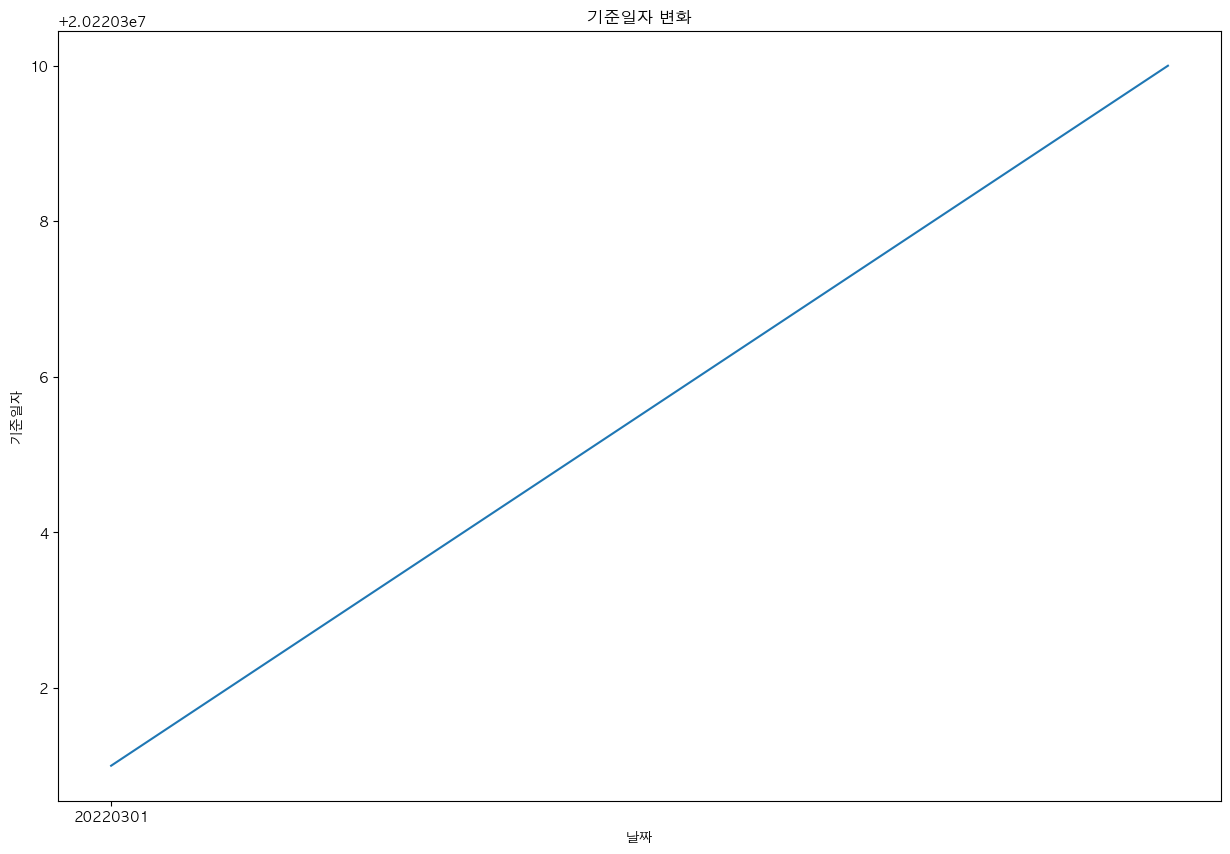

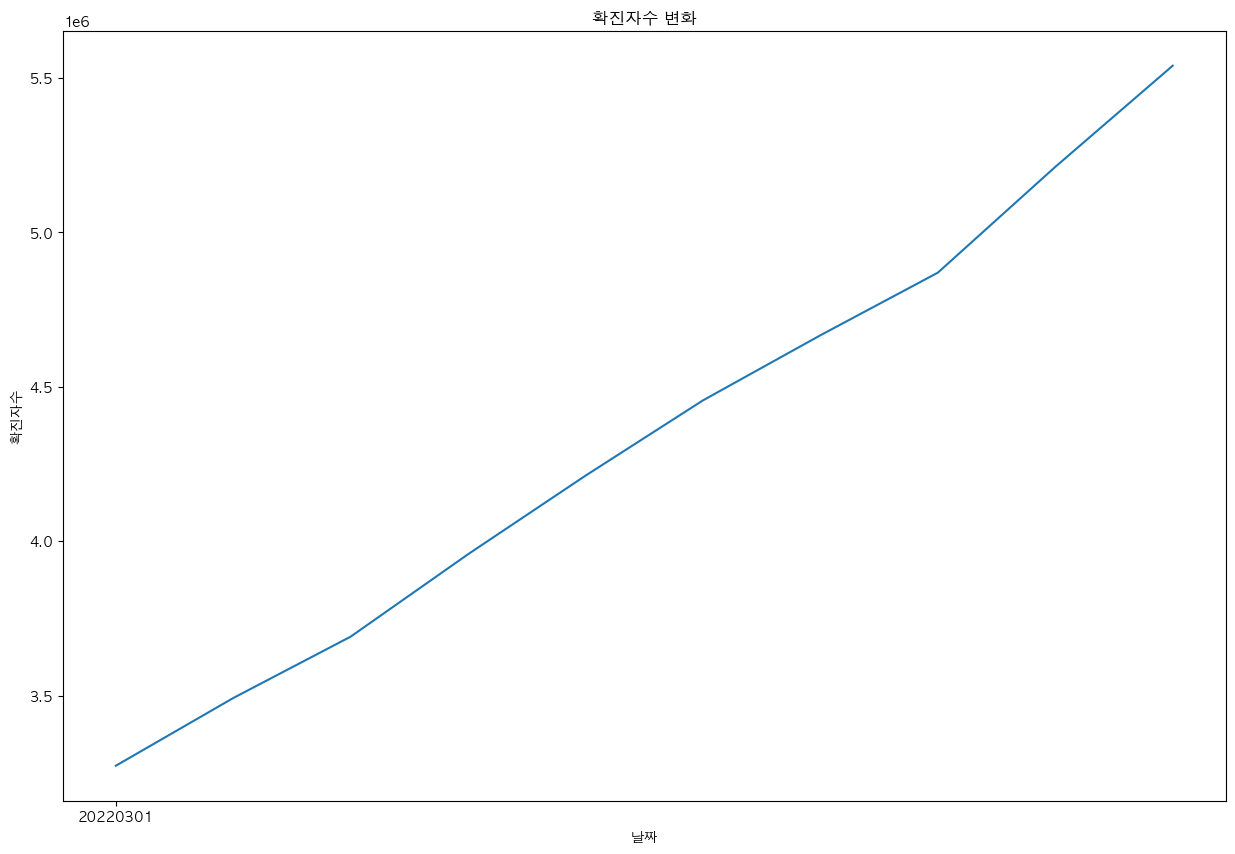

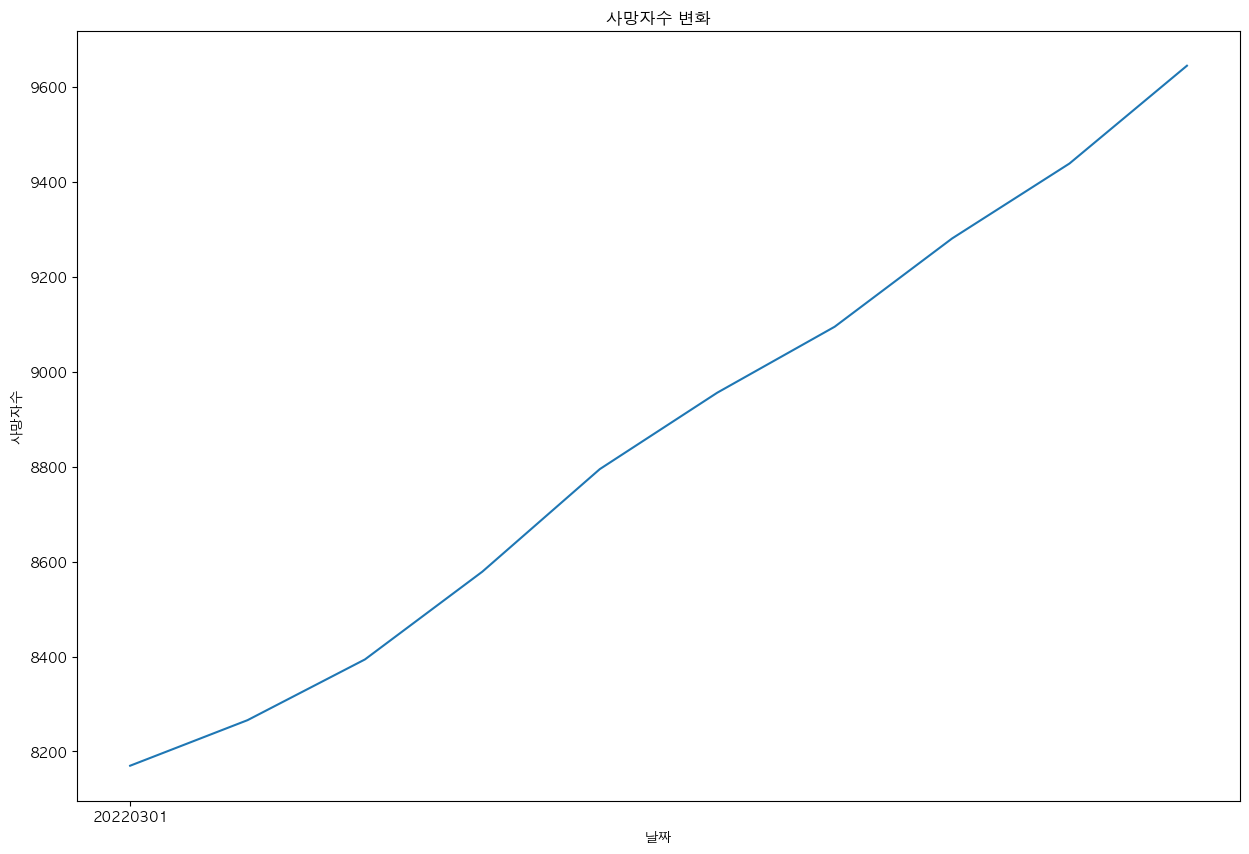

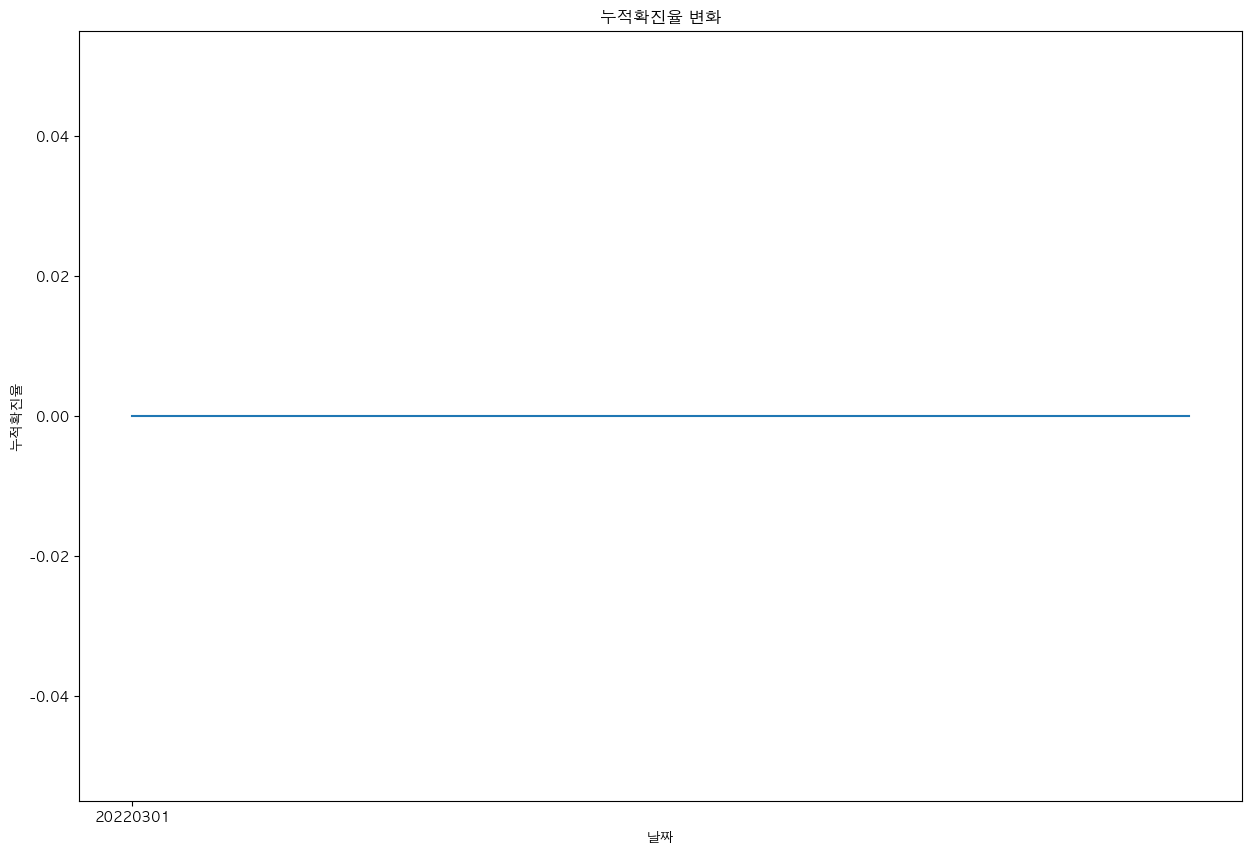

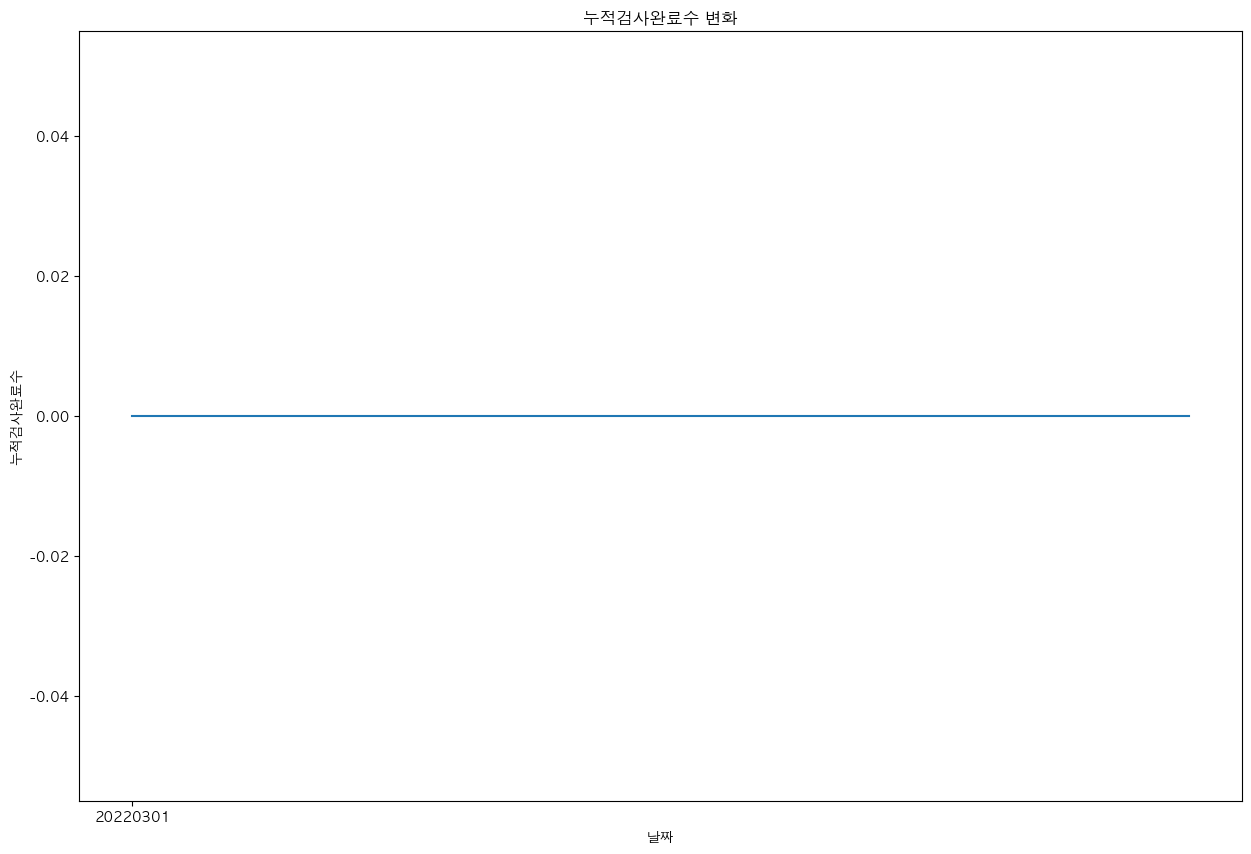

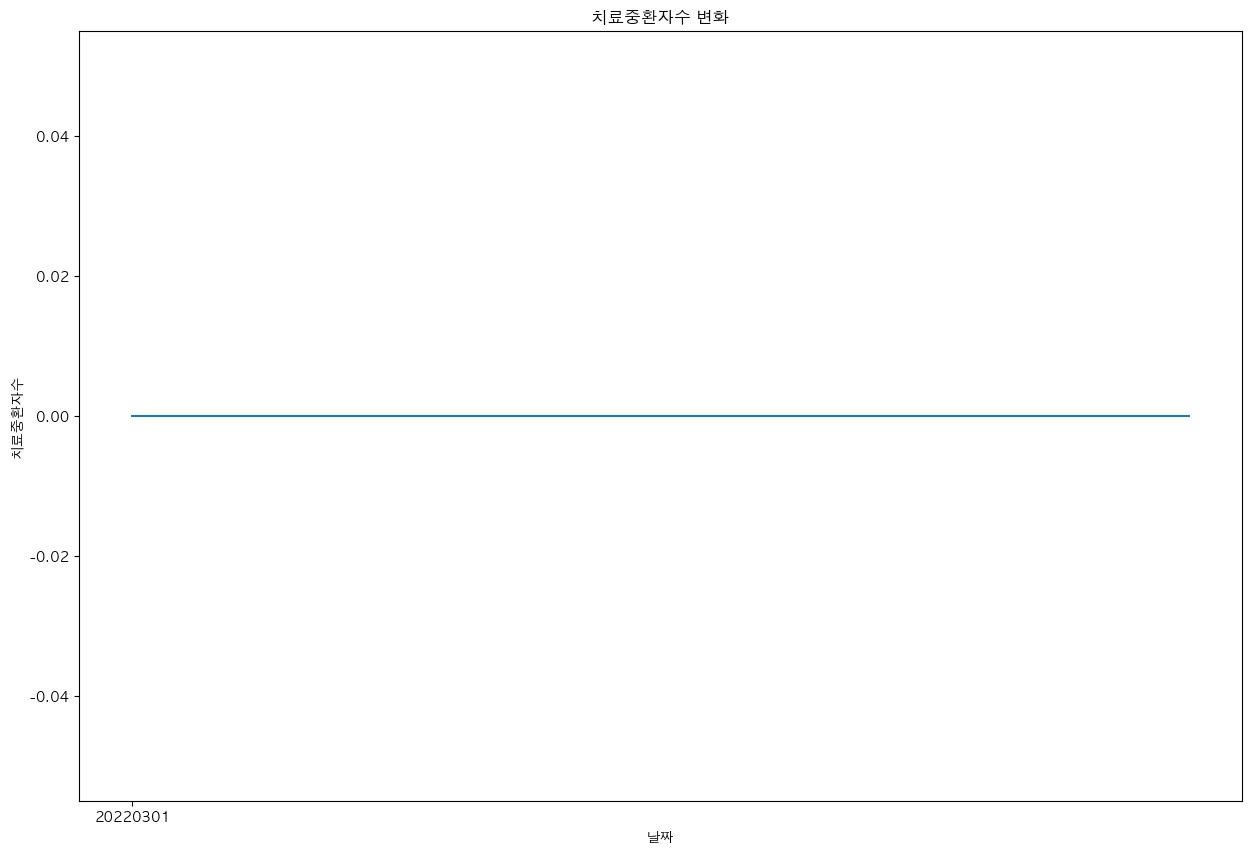

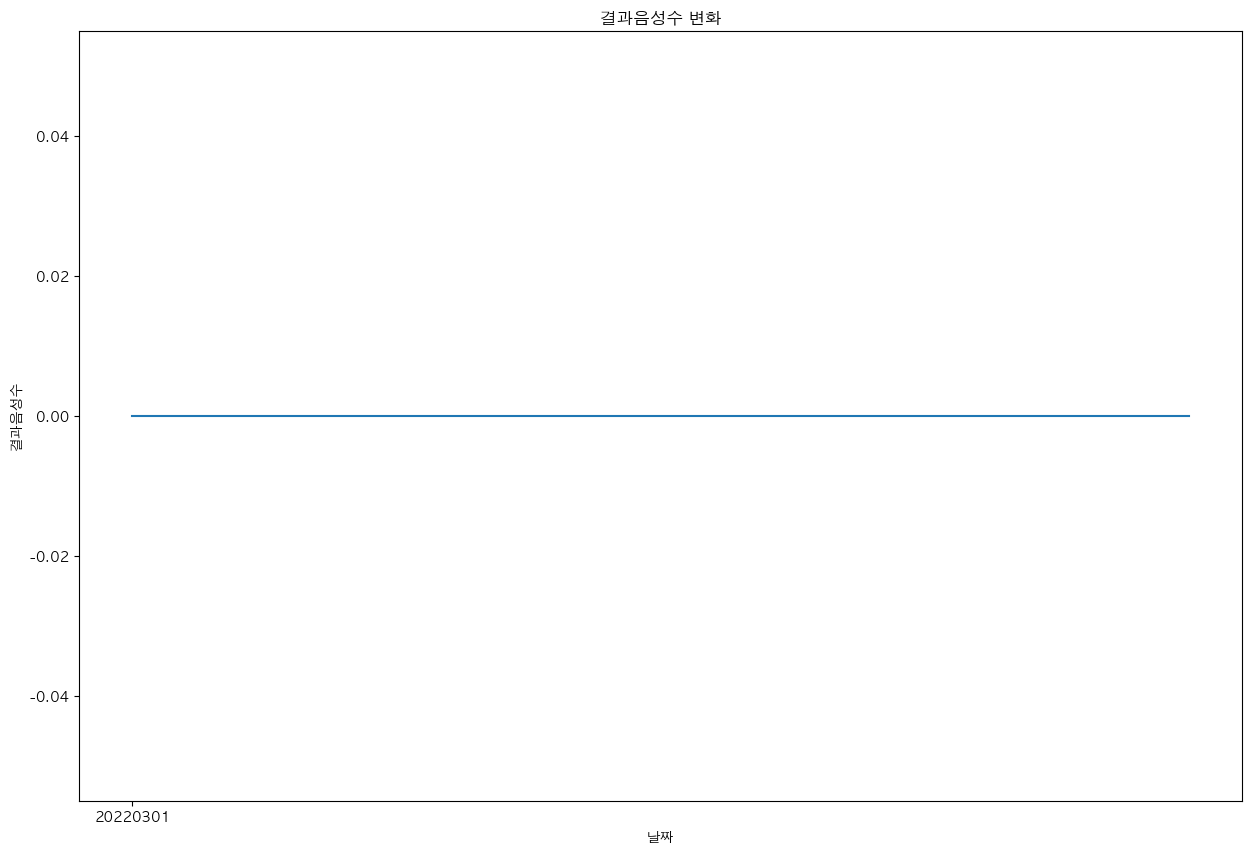

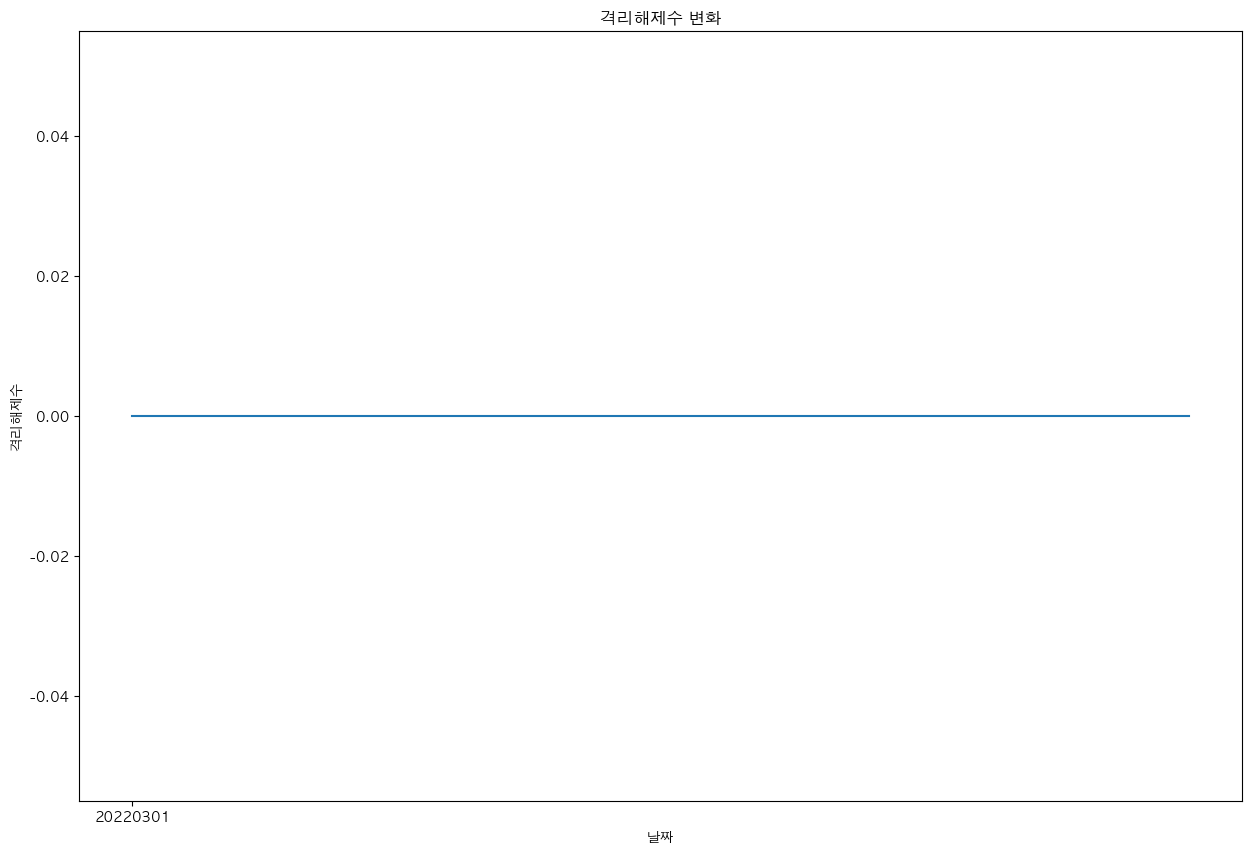

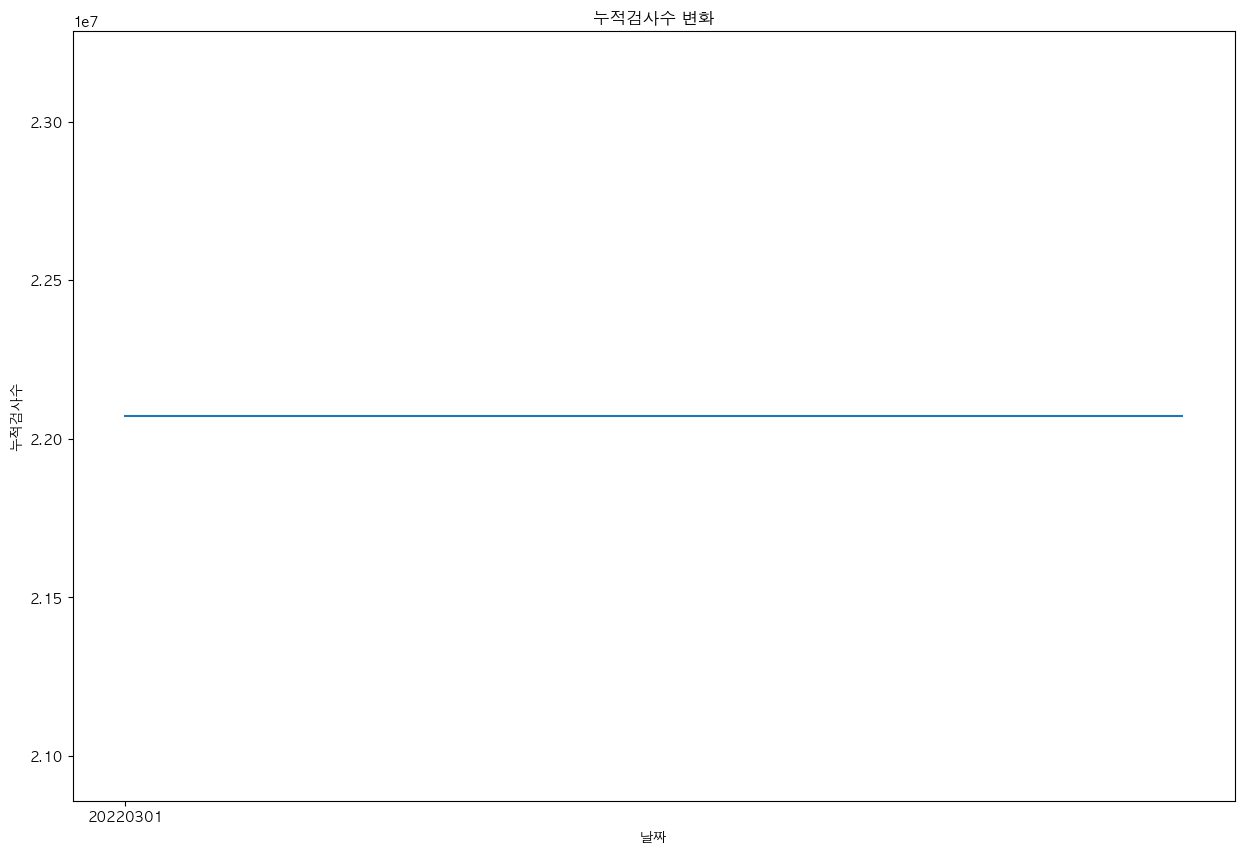

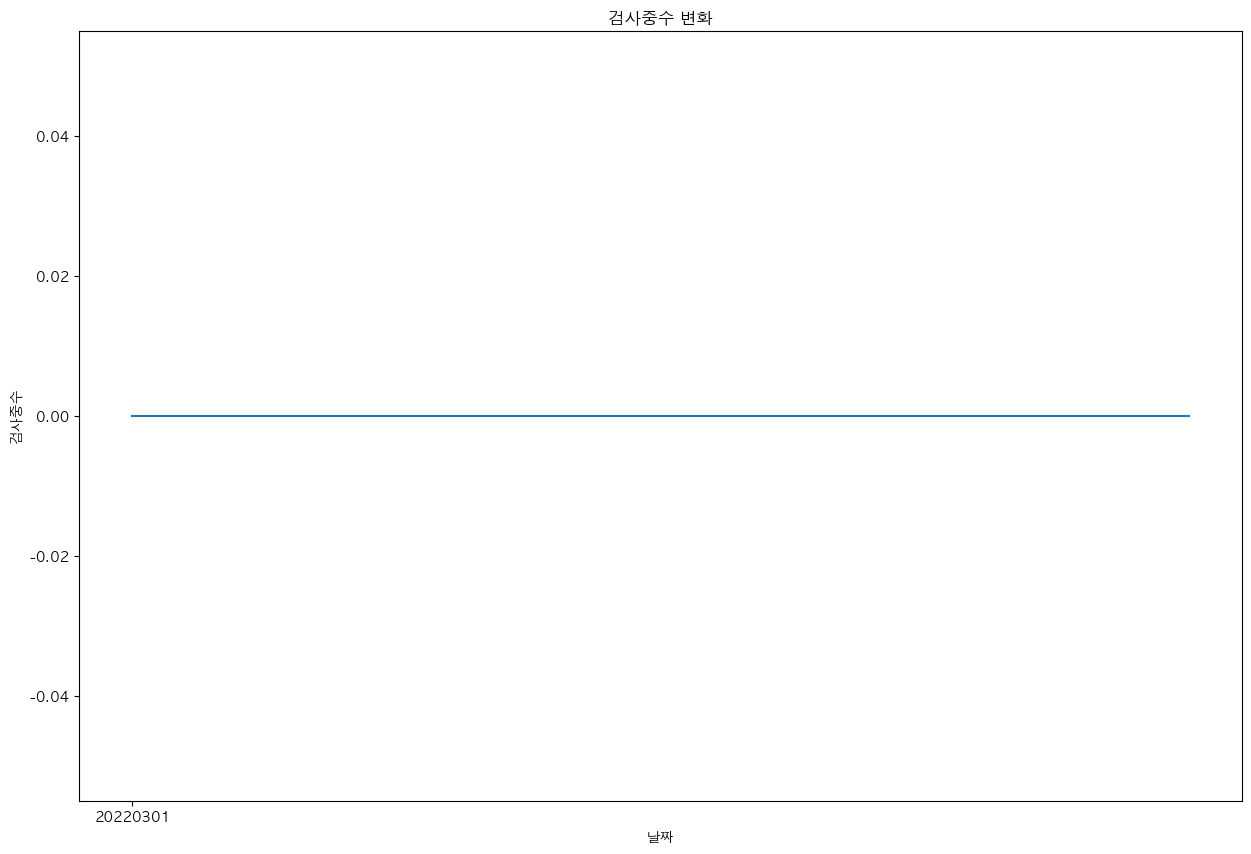

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
import os
import sys
import urllib.request
import requests
import datetime
import time
import json
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
import numpy as np

ServiceKey = '%2FH1gjQ0RIdraQdnpqe1aV%2BT34G1zGrDy1Zwb0PSh0Shg6Qytr2cekv4KuuHXxDJpDUiABfWTLGQRy%2BdywBVn%2Bg%3D%3D'

plt.rcParams['axes.unicode_minus'] = False

def getRequestUrl(url):    
    req = urllib.request.Request(url)    
    try: 
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print ("[%s] Url Request Success")
            return response.read().decode('utf-8')
    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
        return None
    
def getCovidStatsItem(date):    
    service_url = "http://apis.data.go.kr/1352000/ODMS_COVID_02/callCovid02Api"
    parameters = "?serviceKey=" + ServiceKey    
    parameters += "&pageNo=1"
    parameters += "&numOfRows=500"
    parameters += "&apiType=JSON"
    parameters += "&status_dt=" + date

    url = service_url + parameters
    retData = getRequestUrl(url)
    if (retData == None):
        return None
    else:
         return json.loads(retData)
    
def getCovidStatsService(nStartDate, nEndDate, d, jsonResult, result):    
    # 날짜 형식으로 변환
    start_date = datetime.strptime(nStartDate, "%Y%m%d")
    end_date = datetime.strptime(nEndDate, "%Y%m%d")

    # 시작 날짜부터 마감 날짜까지의 모든 날짜를 리스트에 저장
    date_list = []
    while start_date <= end_date:
        date_list.append(start_date.strftime("%Y%m%d"))
        start_date += timedelta(days=1)
    
    isDataEnd = 0   
    
    for i in date_list: 
        print(i)
        d.append(i)
        if(isDataEnd == 1):
            break
            
        jsonData = getCovidStatsItem(i) #getCovidStatsItem 호출
        
        if(jsonData['resultMsg'] == 'NORMAL SERVICE'):
            if( len(jsonData['items']) == 0):
                isDataEnd = 1
                end_date = date
                print("데이터 없음..")
                break
        
        #요청한 json 데이터 출력
        print(json.dumps(jsonData, indent=4, sort_keys=True, ensure_ascii=False))   
        accDefRate = jsonData['items'][0]['accDefRate']    
        dPntCnt = jsonData['items'][0]['dPntCnt']
        gPntCnt = jsonData['items'][0]['gPntCnt']
        hPntCnt = jsonData['items'][0]['hPntCnt']
        accExamCnt = jsonData['items'][0]['accExamCnt']
        statusTime = jsonData['items'][0]['statusTime'] 
        uPntCnt = jsonData['items'][0]['uPntCnt']  
        resutlNegCnt = jsonData['items'][0]['resutlNegCnt']  
        statusDt = jsonData['items'][0]['statusDt']    
        accExamCompCnt = jsonData['items'][0]['accExamCompCnt']   
        careCnt = jsonData['items'][0]['careCnt']  
        
        #jsonResult 리스트에 json형태로 추가
        jsonResult.append({'statusDt': statusDt,                #기준일자
                               'statusTime' : statusTime,           #기준시간
                               'hPntCnt' : hPntCnt,                 #확진자수
                               'gPntCnt' : gPntCnt,                 #사망자수
                               'accDefRate' : accDefRate,           #누적 확진율
                               'accExamCompCnt': accExamCompCnt,    #누적검사완료수
                               'careCnt': careCnt,                  #치료중환자수
                               'resutlNegCnt': resutlNegCnt,        #결과음성수
                               'dPntCnt' : dPntCnt,                 #격리해제수
                               'accExamCnt' : accExamCnt,           #누적검사수
                               'uPntCnt' : uPntCnt,                 #검사중수
                               })
        
        #result 리스트에 추가
        result.append([statusDt, statusTime, hPntCnt, gPntCnt, accDefRate, accExamCompCnt, careCnt, resutlNegCnt, dPntCnt, accExamCnt, uPntCnt])
        
                
    return

rc('font', family = 'AppleGothic')
def main():
    jsonResult = []
    result = []
    d = []
    print("<< 코로나 통계 데이터를 수집합니다. >>")
    nStartDate =input('데이터를 몇 년부터 수집할까요?(연월일) : ')
    nEndDate = input('데이터를 몇 년까지 수집할까요?(연월일) : ')
    
    getCovidStatsService(nStartDate, nEndDate, d , jsonResult, result)

    if (len(result) == 0) : #URL 요청은 성공하였지만, 데이터 제공이 안된 경우
        print('데이터가 전달되지 않았습니다. 공공데이터포털의 서비스 상태를 확인하기 바랍니다.')
        
    else:
        #json 파일저장     
        with open('/Users/yanghyunjik/Desktop/bigdata/covid_%s_%s_%s.json' % (nStartDate, nEndDate, "코로나 감염 현황"), 'w', encoding='utf8') as outfile:
            jsonFile  = json.dumps(jsonResult, indent=4, sort_keys=True, ensure_ascii=False)
            outfile.write(jsonFile)

        #csv 파일저장 
        columns = ["기준일자","기준시간","확진자수","사망자수","누적확진율","누적검사완료수","치료중환자수","결과음성수","격리해제수","누적검사수","검사중수"]                
        result_df = pd.DataFrame(result, columns = columns)
        result_df.to_csv('/Users/yanghyunjik/Desktop/bigdata/covid_%s_%s_%s.csv' % (nStartDate, nEndDate, "코로나 감염 현황"),index=False, encoding='cp949')
        
        #시각화
        df = pd.read_csv('/Users/yanghyunjik/Desktop/bigdata/covid_%s_%s_%s.csv' % (nStartDate, nEndDate, "코로나 감염 현황"), encoding='cp949', index_col=1)
        index = df.columns.values
        for i in index:
            plt.figure(figsize=(15,10))
            plt.title(i+" 변화")
            plt.plot(d,df[i])
            plt.xlabel("날짜")
            plt.ylabel(i)
            plt.xticks(np.arange(0, len(d)+1, 30))
            plt.show()

    
if __name__ == '__main__':
    main()